# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data_car = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data_car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Information about dataset

In [6]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
data_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
data_car.size

5330

In [9]:
data_car.shape

(205, 26)

In [10]:
data_car.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

 

In [11]:
data_car.duplicated().sum()

0

In [12]:
data_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
print(data_car.fueltype.value_counts())
print(data_car.aspiration.value_counts())
print(data_car.doornumber.value_counts())
print(data_car.carbody.value_counts())
print(data_car.drivewheel.value_counts())
print(data_car.enginelocation.value_counts())
print(data_car.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


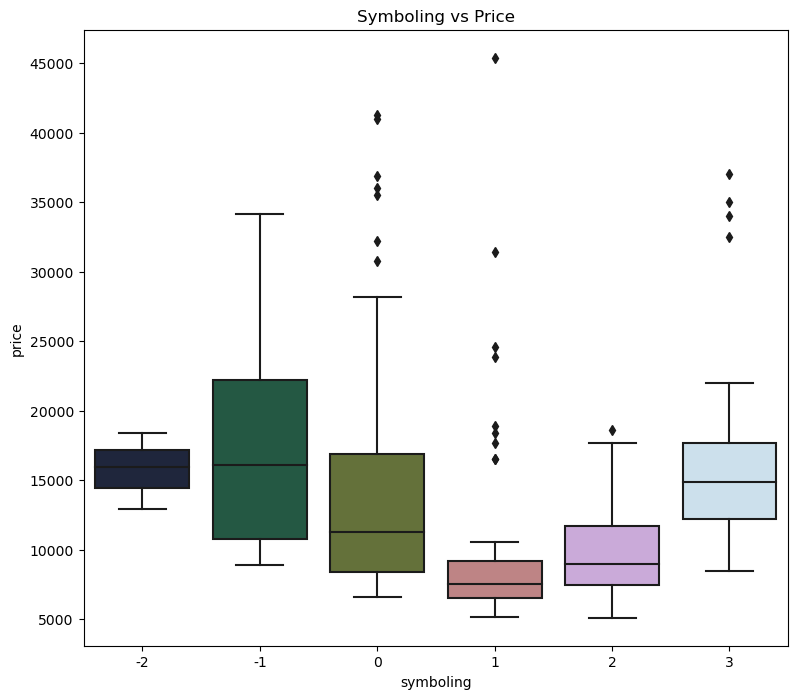

In [14]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Symboling vs Price')
sb.boxplot(x=data_car.symboling, y=data_car.price, palette=("cubehelix"))
pt.show()

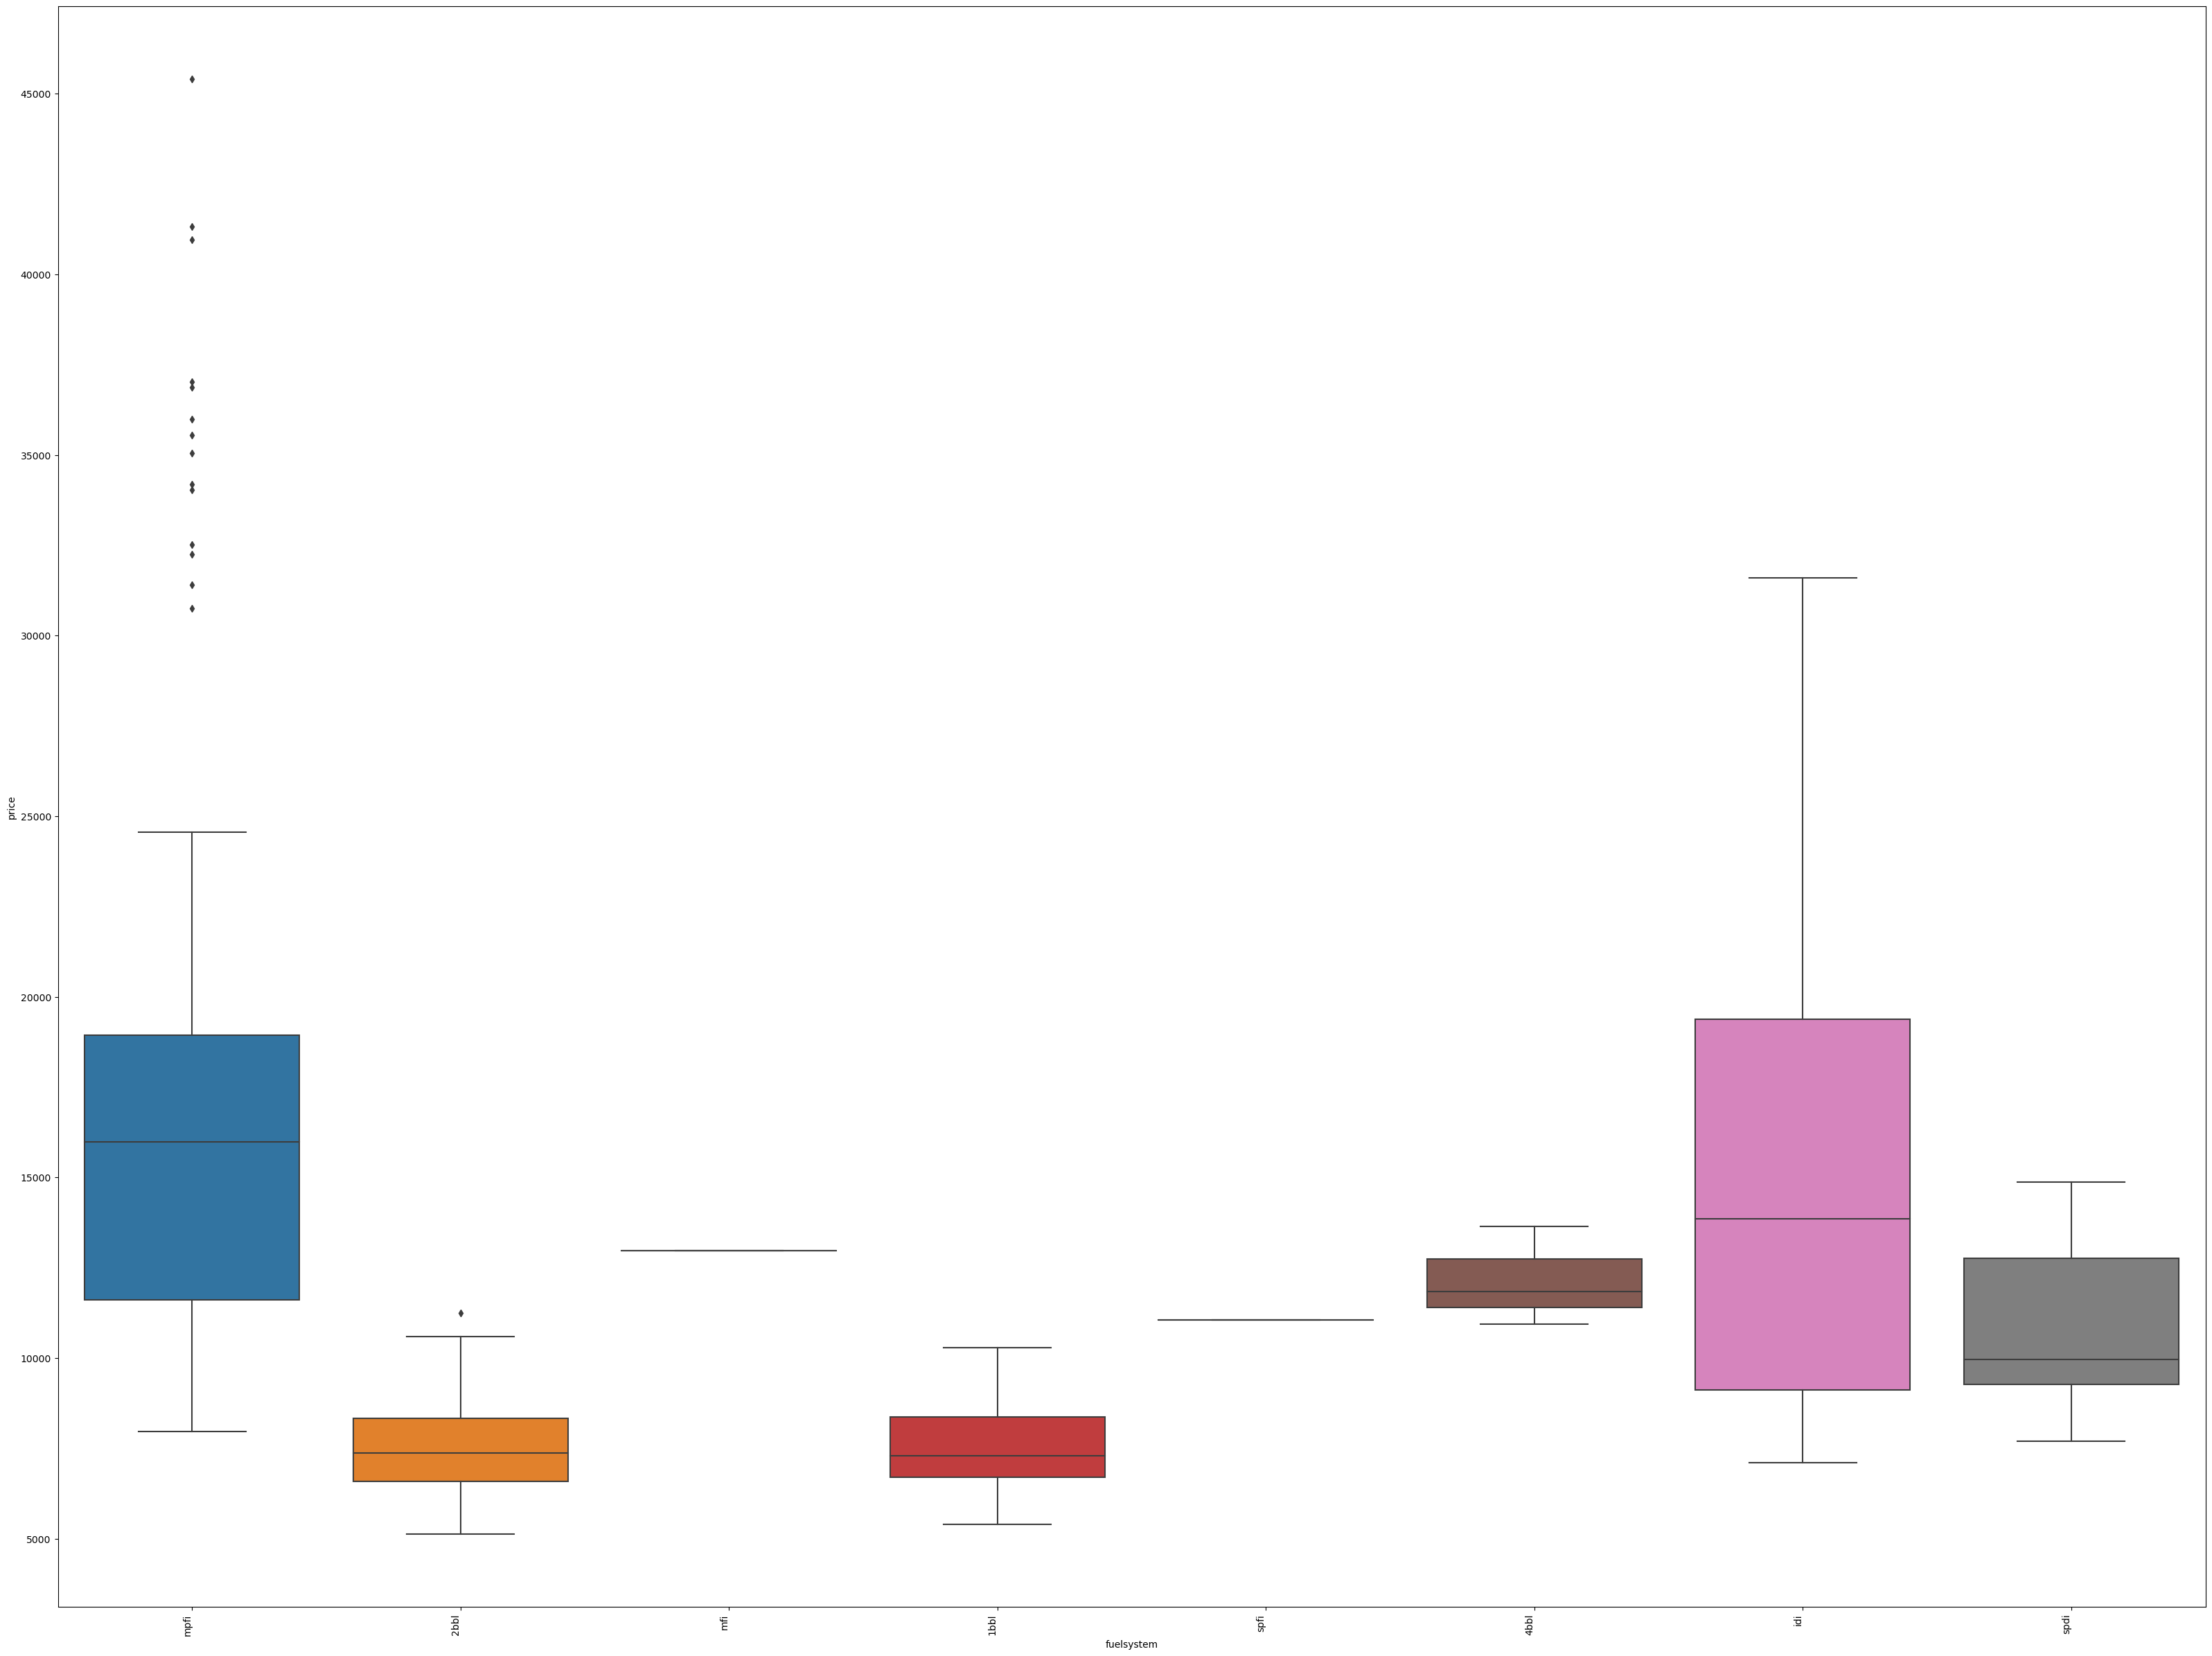

In [15]:
pt.subplots(figsize=(40,30))
a=sb.boxplot(x='fuelsystem',y='price',data=data_car)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

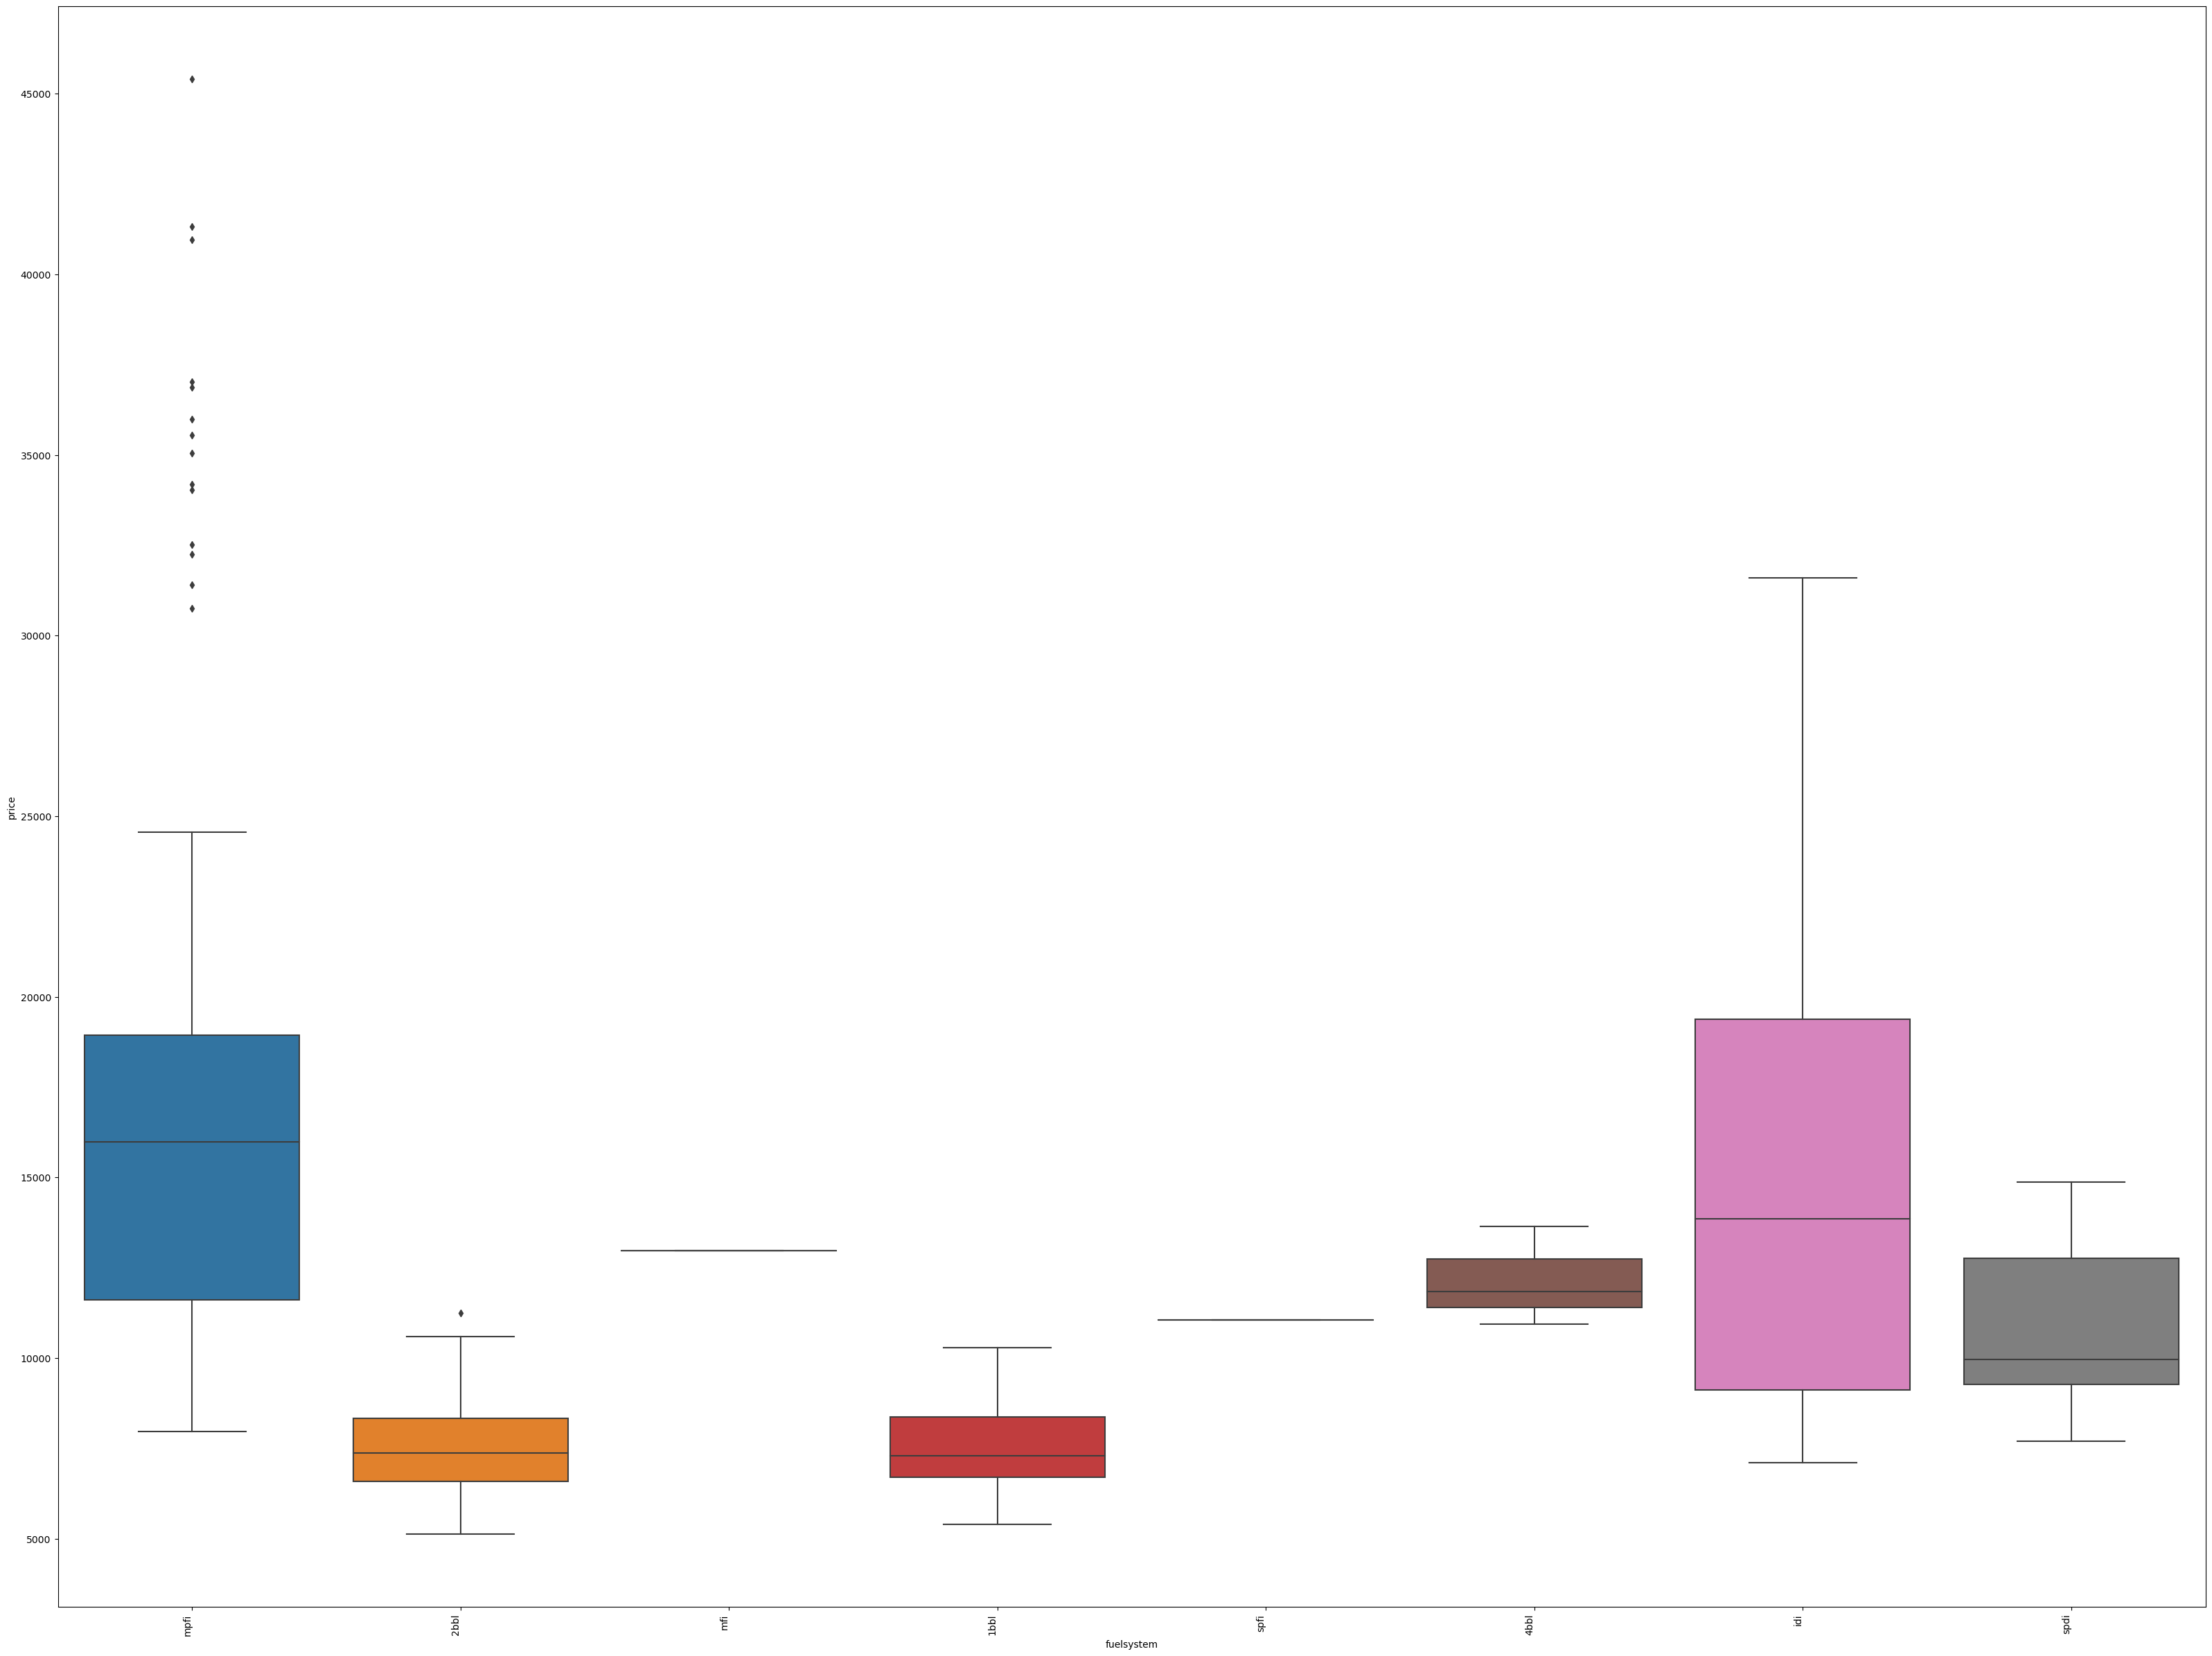

In [16]:
pt.subplots(figsize=(40,30))
a=sb.boxplot(x='fuelsystem',y='price',data=data_car)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

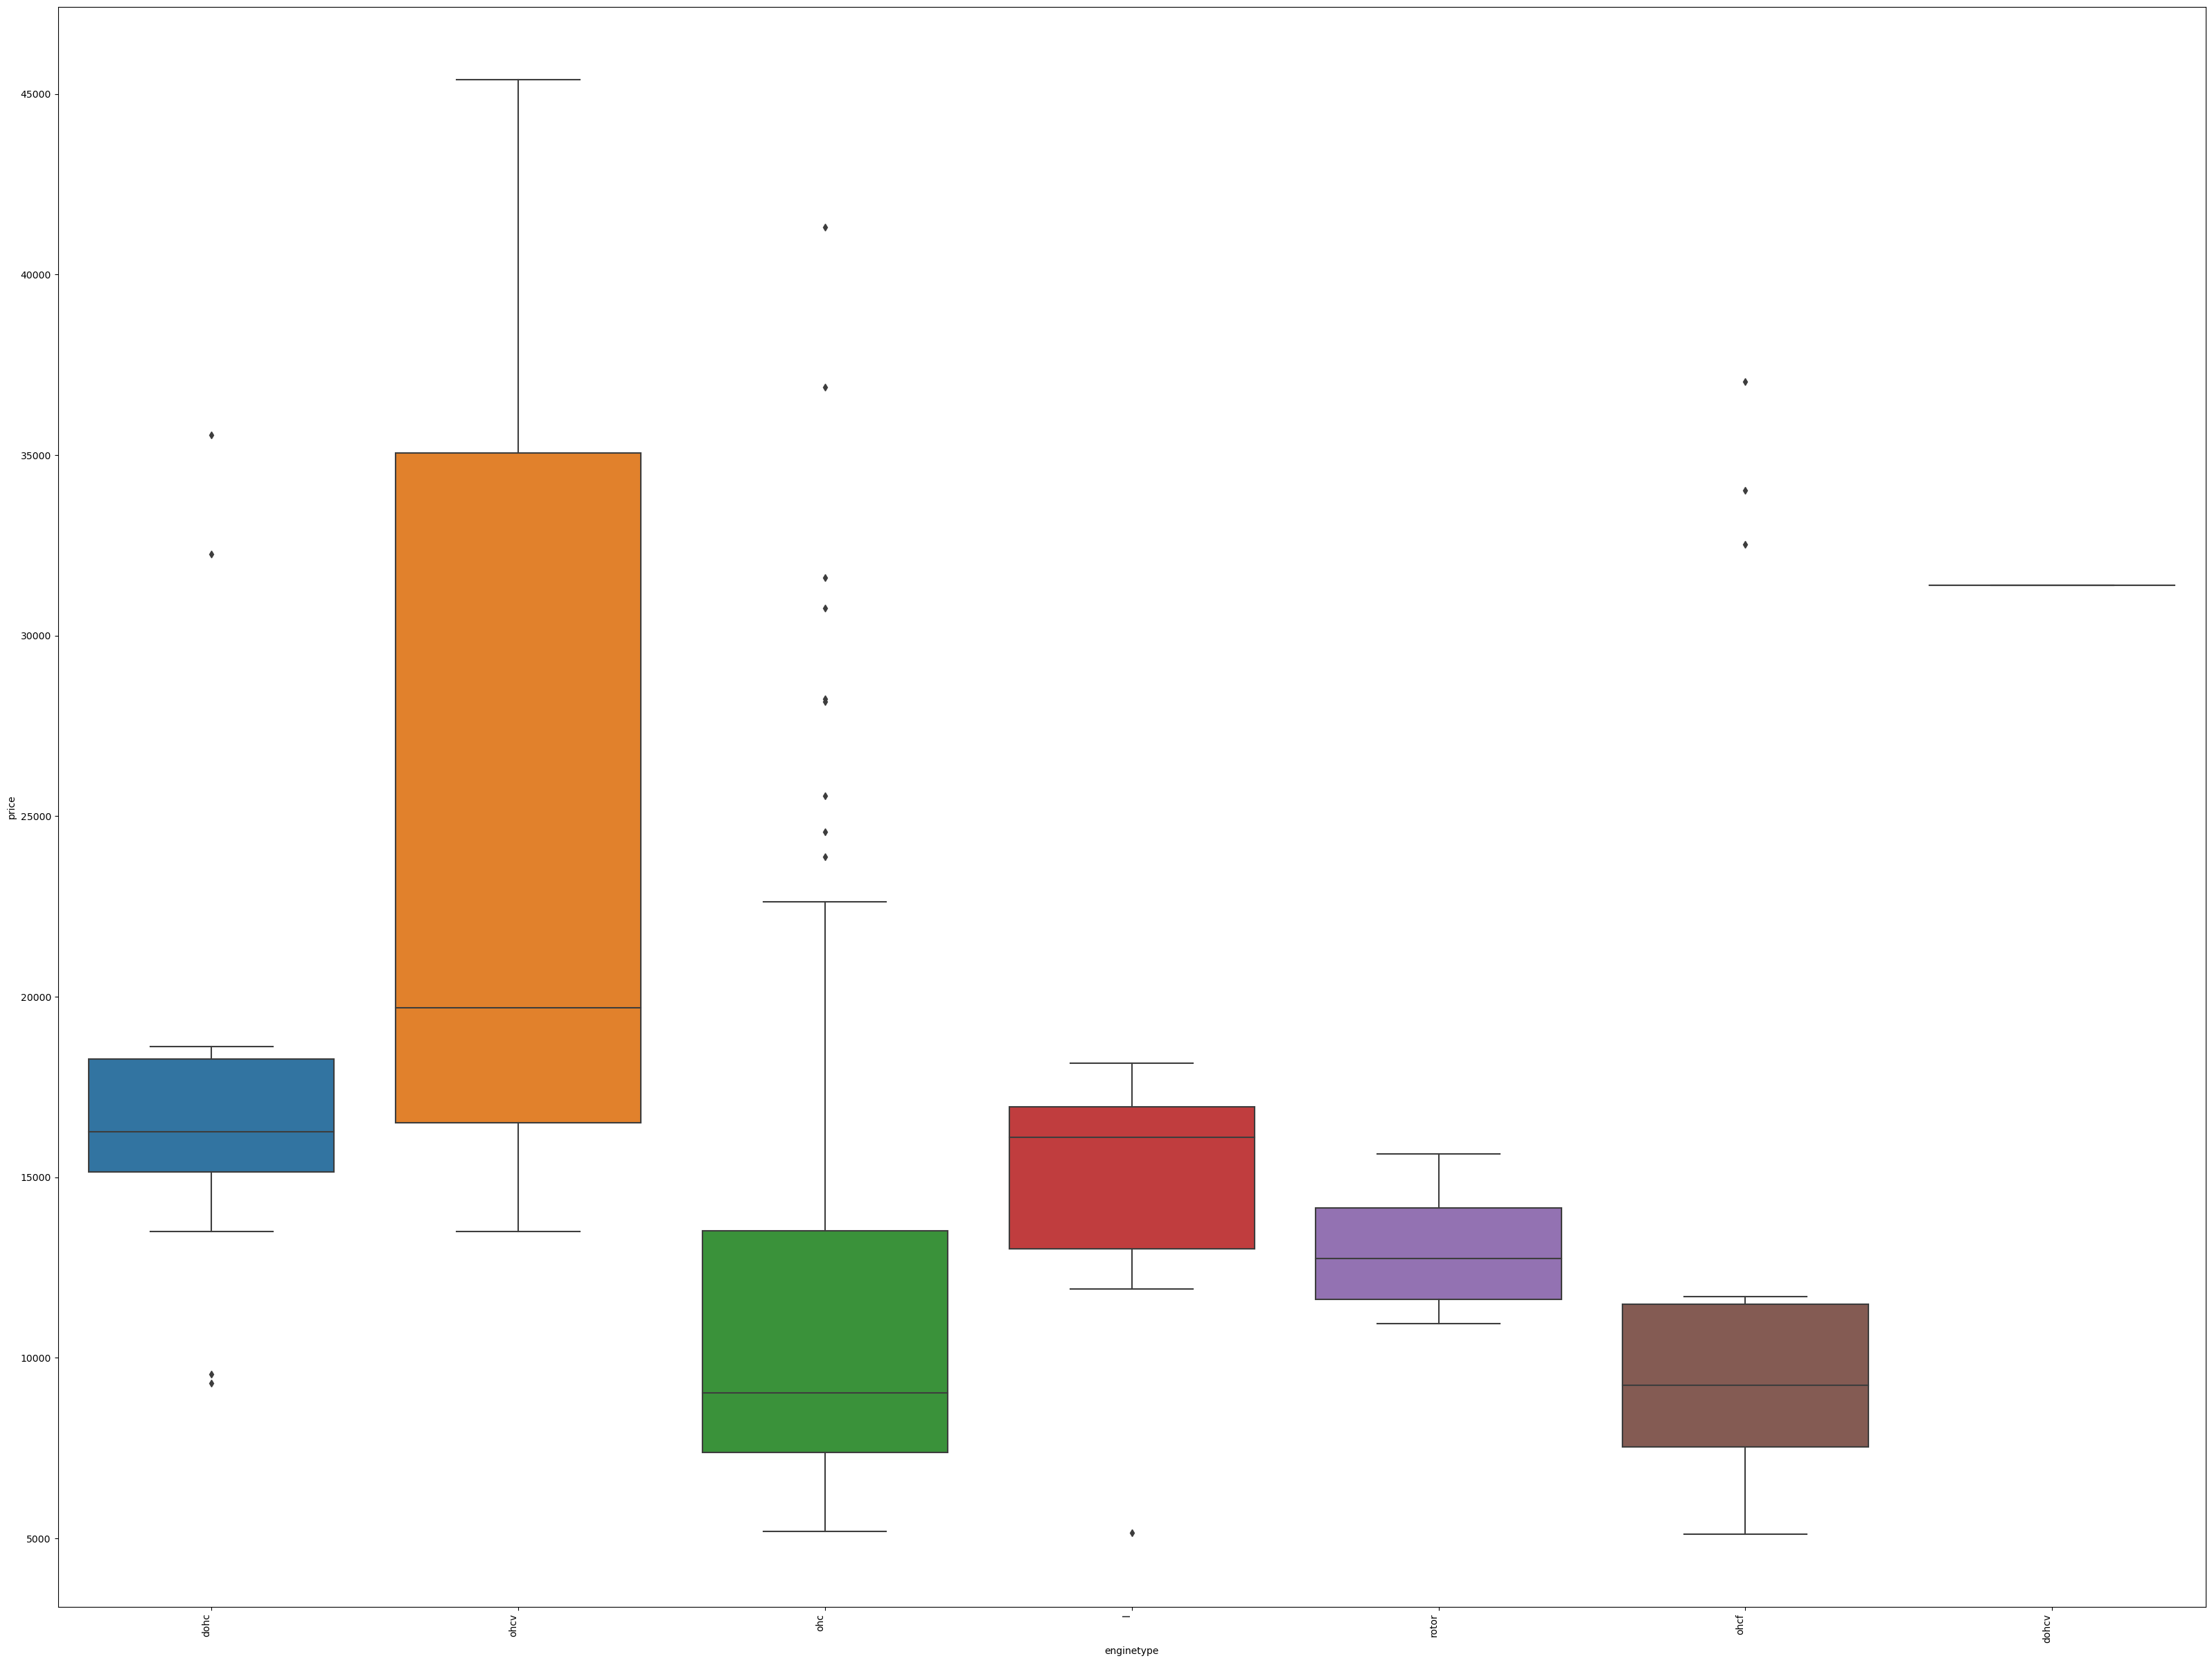

In [17]:
pt.subplots(figsize=(40,30))
a=sb.boxplot(x='enginetype',y='price',data=data_car)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

C:\Users\Priya\AppData\Local\Temp\ipykernel_8540\2984153815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_car.price)


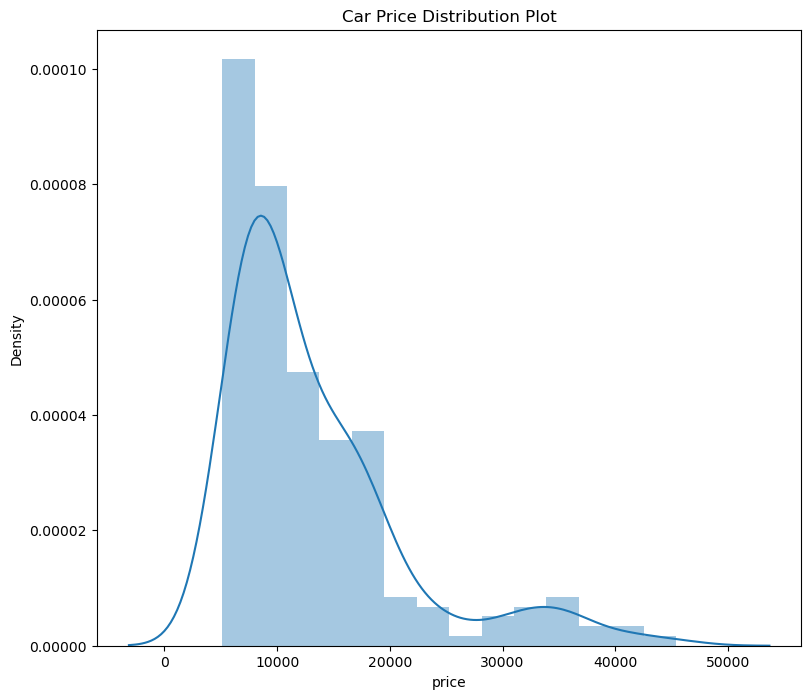

In [18]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,1)
pt.title('Car Price Distribution Plot')
sb.distplot(data_car.price)
pt.show()

<Axes: title={'center': 'Car Price Spread'}, ylabel='price'>

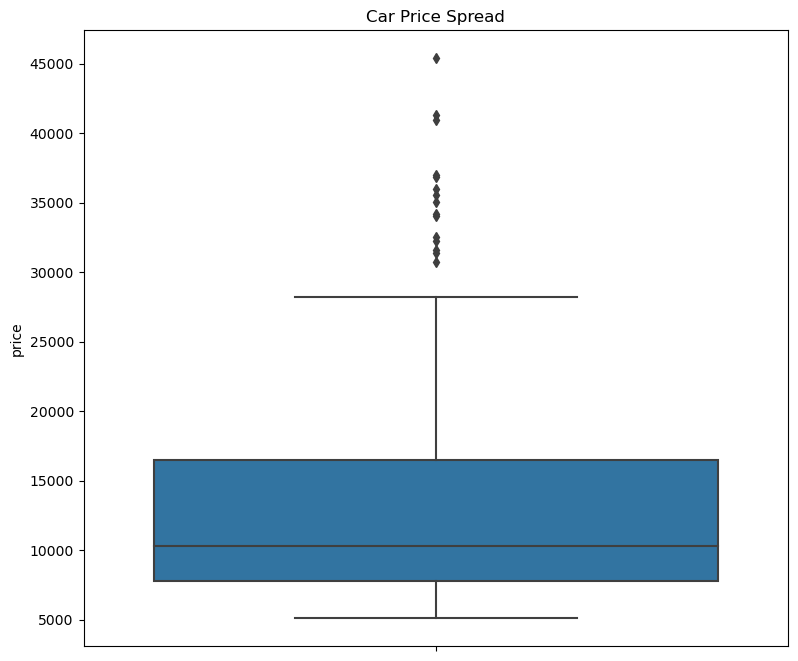

In [19]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Car Price Spread')
sb.boxplot(y=data_car.price)

C:\Users\Priya\AppData\Local\Temp\ipykernel_8540\2875011780.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrrr=data_car.corr()


<Axes: >

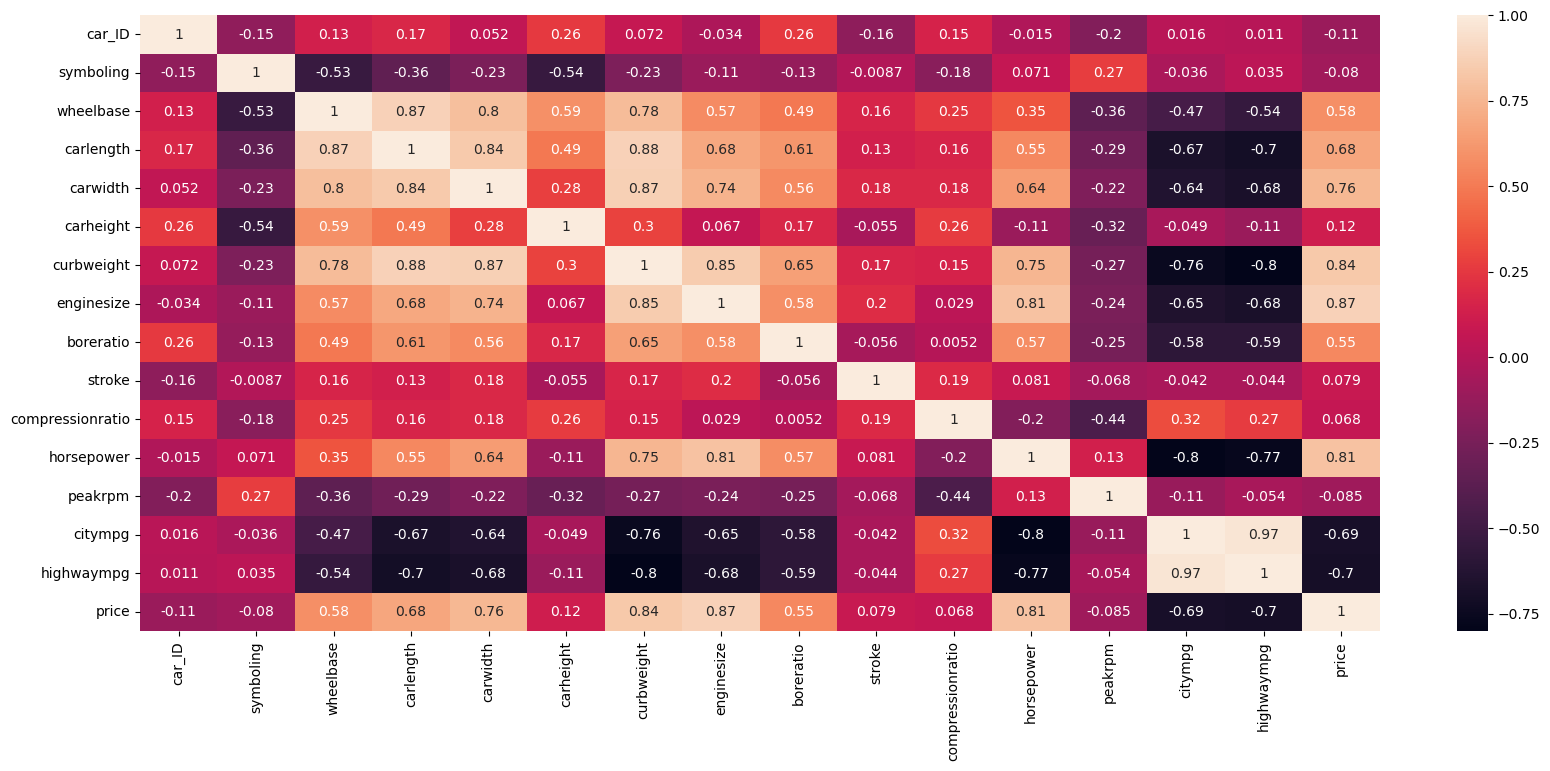

In [20]:
pt.figure(figsize=(20,8))
corrrr=data_car.corr()
sb.heatmap(corrrr, xticklabels=corrrr.columns, yticklabels=corrrr.columns, annot=True)

# Training and Testing

In [22]:
data_car = pd.get_dummies(data_car, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','cylindernumber','enginelocation','enginetype', 'fuelsystem'])
print(data_car)

     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0        64.1       48.8        2548       

In [23]:
x_ = data_car.drop(['CarName','price'],axis=1)
y_ = data_car[['price']]

In [24]:
x_

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [25]:
y_

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.25,random_state=50)

In [27]:
x_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0
171,172,2,98.4,176.2,65.6,52.0,2714,146,3.62,3.50,...,0,0,0,0,0,0,0,1,0,0
181,182,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,...,0,0,0,0,0,0,0,1,0,0
48,49,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,...,0,0,0,0,0,0,0,1,0,0
183,184,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,...,0,0,0,0,0,0,0,1,0,0
33,34,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,...,0,0,1,0,0,0,0,0,0,0
109,110,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,...,0,0,0,0,0,0,0,1,0,0
139,140,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0


In [28]:
y_train

,price
140,7603.0
171,11549.0
181,15750.0
48,35550.0
183,7975.0
...,...
132,11850.0
33,6529.0
109,12440.0
139,7053.0


# Linear Regression

In [29]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predt= model1.predict(x_test)

In [31]:
Mean_absolute_error = mean_absolute_error(y_test,y_predt)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_absolute_error: 1730.6302456600836


In [32]:
Mean_squared_error = mean_squared_error(y_test,y_predt)
print('Mean_squared_error:',Mean_squared_error)

Mean_squared_error: 4760383.6290766


In [33]:
Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

Root_Mean_squared_error: 2181.830339205274


In [34]:
R_Squared = r2_score(y_test,y_predt)
print('R-Squared:',R_Squared)

R-Squared: 0.9027139470420894


In [35]:
AdjRsquared = 1-((1-R_Squared)*(len(x_train)-1)/(len(x_train)))
print(AdjRsquared)

0.9033498035973698


In [36]:
y_predt

array([[15800.3665492 ],
       [12433.38785266],
       [22533.50206968],
       [44302.76574234],
       [13613.61665517],
       [ 8036.90266728],
       [13148.63403019],
       [21354.63619524],
       [ 9015.84696144],
       [ 6368.63444219],
       [13758.26497792],
       [ 6432.91881153],
       [24837.71791614],
       [ 9218.92479178],
       [ 7783.38025412],
       [10385.53349535],
       [13496.08453378],
       [10942.66021962],
       [ 8642.78244856],
       [10346.83410513],
       [ 4876.69876162],
       [14038.92679859],
       [ 7142.35071563],
       [21183.22969802],
       [ 7148.40437452],
       [18787.8978725 ],
       [17936.12184429],
       [ 6927.29260417],
       [ 5186.83806947],
       [11968.60121964],
       [14634.20177768],
       [ 5406.07070484],
       [ 6761.57865839],
       [ 8934.53381884],
       [ 5424.94748266],
       [ 6997.48795386],
       [13468.39774635],
       [ 6846.91255669],
       [ 8881.29263758],
       [ 8483.23841938],


In [37]:
y_test

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


In [38]:
y_test - y_predt

,price
113,894.633451
170,-1234.387853
12,-1563.502070
73,-3342.765742
145,-2354.616655
20,-1461.902667
107,-1248.634030
8,2520.363805
39,-170.846961
89,-869.634442
